# Ergodicidade na autocorrelação

Para um processo ergódico na autocorrelação a função de autocorrelação do processo pode ser estimada tomando a média temporal, por um tempo suficientemente longo, da função de autocorrelação de uma única função amostra.

$\hat{R}_X(\tau) = \langle x(t)x(t+\tau) \rangle = \lim_{T \to \infty} \frac{1}{2T} \int_{-T}^T x(t)x(t+\tau)\, dt$

Pode-se observar uma similaridade entre a média temporal da função de autocorrelação e a convolução entre $x(t)$ e $x(-t)$. Vamos usar esse fato para estimar $R_X(\tau)$.

Tomando uma função amostra $x(t)$ confinada no intervalo $(-T,T)$ então

$\langle x(t)x(t+\tau) \rangle = \frac{1}{2T-\tau} \int_{-T}^{T-\tau} x(t)x(t+\tau)\, dt$ e

$x(t)*x(-t) = \int_{-T}^{T-\tau} x(t)x(t+\tau)\, dt$, para $\tau > 0$.

Em geral temos a relação

$\langle x(t)x(t+\tau) \rangle = \frac{x(t)*x(-t)}{2T - |\tau|}$

In [1]:
"""
@author: albert
IQuanta - DEE - UFCG
Data: julho 2022
Versão: 1.0
"""

#import random
import matplotlib.pyplot as plt
import numpy as np
from numpy import random, sin, cos

"""
Estimação da autocorrelação de X(t) por uma função amostra x(t)

x    = x(t)
T    -T < t < T
tau  eixo dos tempos para função de autocorrelação
Ts   intervalo de amostragem
""" 
def autocorr(x,T,tau,Ts):
    x_rev = np.flip(x)    # x(-t)
    y = np.convolve(x, x_rev)    # y = x(t)*x(-t)
    # print(len(y))
    z = 2*T - abs(tau)           # z = 2T - |tau|
    # print(len(z))
    ts = Ts*y
    R_X_estimado = np.divide(ts,z)  # (x(t)*x(-t))/(2T - |tau|) = R_X(tau) estimado
    return(R_X_estimado)

## Ergodicidade na média

Vamos estimar a média temporal de uma função amostra $x(t)$

$\langle x(t) \rangle \approx \frac{1}{2T} \int_{-T}^{T} x(t) \, dt \approx \frac{1}{2T} \sum_{k=-T}^T x(t_k)$

In [2]:
"""
Estimação da média temporal de uma função amostra de um PE ergódico

x    = x(t)
"""
def media_temporal(x):
    N_amostras = len(x)
    EX = np.sum(x)/N_amostras
    return(EX)

## Exemplo 1: uma senóide com fase aleatória

Considere o processo estocástico $X(t) = a\text{sen}(2\pi ft + \Theta)$, em que $\Theta$ é um v.a. uniformemente distribuída entre $0$ e $2\pi$. Sabemos que esse processo é ergódico na média bem como na autocorrelação e 

$R_X(\tau) = (a^2/2)\cos(2\pi f\tau)$

Vamos usar uma função amostra de $X(t)$, $x(t) = a\text{sen}(2\pi ft + \theta)$ para estimar $R_X(\tau)$

/home/albert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


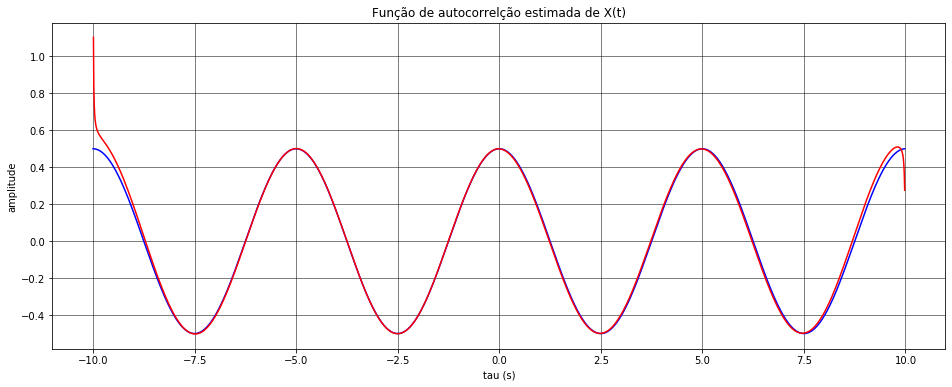

In [3]:
a = 1       # amplitude
f = 0.2       # frequência
T = 5       # -T < t < T
Ts = 0.01   # tempo entre amostras

t = np.arange(-T,T,Ts)   # eixo dos tempos

teta = np.random.uniform(0,2*np.pi)  # fase aleatória

# Construção da função amostra x(t) = a sen(2pi ft + teta)
x = np.sin(2*np.pi*f*t + teta)


tau = np.arange(-2*T,2*T-1.1*Ts,Ts)   # (2T-1.1Ts é um ajuste do número de amostras do tempo tau

# Autocorrelação analítica
R_Xv = ((a**2)/2.)*np.cos(2*np.pi*f*tau)

# Autocorrelação estimada
R_Xe = autocorr(x,T,tau,Ts)

# mostrar graficamente
plt.figure(figsize=(16,6))
plt.title("Função de autocorrelção estimada de X(t)")
#plt.figure()
plt.plot(tau,R_Xv,'b')
plt.plot(tau,R_Xe,'r')
#plt.ylim(quad.min(0)-0.1, quad.max(0)+0.1)
#plt.xlim(0,t.max(0))
plt.xlabel('tau (s)')
plt.ylabel('amplitude')
plt.grid(color='k', linestyle='-', linewidth=0.5)


In [4]:
print("média temporal estimada, EX(t) =", media_temporal(x))

média temporal estimada, EX(t) = -1.5845103007450234e-14


## Exemplo 2: soma de senóides com fase aleatória

Considere o processo estocástico $X(t)$ como a soma de $n$ senóides com fase aleatória

$X(t) = \sum_{k=1}^n a_k\cos(2\pi f_kt + \Theta)$, 

em que $\Theta$ é um v.a. uniformemente distribuída entre $0$ e $2\pi$. Sabemos que esse processo é ergódico na média bem como na autocorrelação e que

$R_X(\tau) = \sum_{k=1}^n (a_k^2/2)\cos(2\pi f_k\tau)$

Vamos usar uma função amostra de $X(t)$, $x(t) = \sum_{k=1}^n a_k\text{sen}(2\pi ft + \theta_k)$ para estimar $R_X(\tau)$

/home/albert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


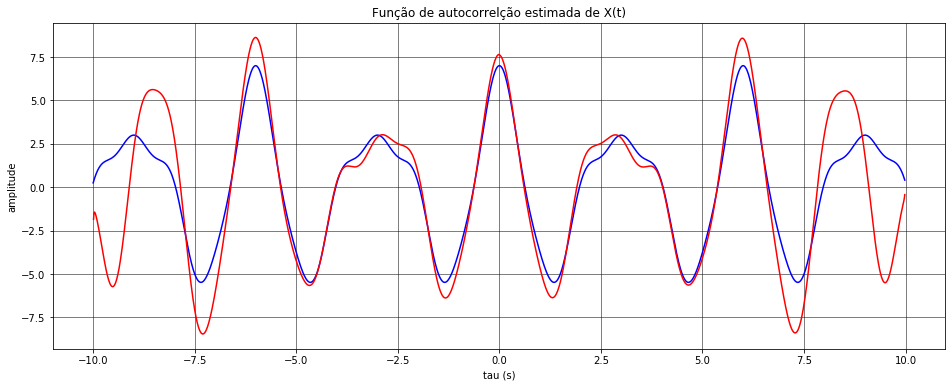

In [5]:
n = 3        # número de senóides 
ak = np.arange(1,n+1)       # amplitudes determinísticas
fk = 1/ak               # frequências determinísticas
T = 5       # -T < t < T
Ts = 0.01   # tempo entre amostras

t = np.arange(-T,T,Ts)   # eixo dos tempos

teta = np.random.uniform(0,2*np.pi,n)  # fase aleatória

# Construção da função amostra x(t) = soma(ak cos(2pi fkt + tetak))
x = np.zeros(len(t))
for i in np.arange(n):
    x = x + ak[i]*np.cos(2*np.pi*fk[i]*t + teta[i])


tau = np.arange(-2*T,2*T-1.1*Ts,Ts)   # (2T-1.1Ts é um ajuste do número de amostras do tempo tau

# Autocorrelação analítica
R_X_a = np.zeros(len(tau))
for i in np.arange(n):
    R_X_a = R_X_a + ((ak[i]**2)/2.)*np.cos(2*np.pi*fk[i]*tau)

# Autocorrelação estimada
R_X_e = autocorr(x,T,tau,Ts)

# mostrar graficamente
plt.figure(figsize=(16,6))
plt.title("Função de autocorrelção estimada de X(t)")
#plt.figure()
plt.plot(tau,R_X_a,'b')
plt.plot(tau,R_X_e,'r')
#plt.ylim(quad.min(0)-0.1, quad.max(0)+0.1)
#plt.xlim(0,t.max(0))
plt.xlabel('tau (s)')
plt.ylabel('amplitude')
plt.grid(color='k', linestyle='-', linewidth=0.5)


Observem nos dois exemplos que a estimação piora a medida que $|\tau| \to 2T$, pensando em $2T - |\tau|$ como o número de amostras para estimação, esse número diminui nas extremidades provocando uma degradação na estimação.

In [6]:
print("média temporal estimada, EX = ", media_temporal(x))

média temporal estimada, EX =  0.08546083536286403
